In [1]:
import json
import numpy as np
import pandas as pd
from pandas import json_normalize
import requests
import re
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:

headers = {"User-Agent": "Mozilla/5.0"}

brand = []
model = []
Range = []
efficiency = []
battery = []
fastcharge_speed = []
weight = []
acceleration = []
towweight = []
cargo = []
long_distance_total = []
priceperrange = []
market_segment = []
seats = []

def extract_number(text):
    "Returns only digits / decimal numbers"
    value = re.findall(r"[\d.]+", text)
    return value[0] if value else np.nan


for page in range(1, 51):
    print(f"Scraping page {page}...")
    url = f"https://ev-database.org/?page={page}"
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        soup = bs(response.text, "html.parser")
        element = soup.find_all("div", class_="list-item")

        for item in element:

            # Brand & Model
            a = item.find("a", class_="title")
            if a:
                model_text = a.text.strip()
                model.append(model_text)
                brand.append(re.findall(r"^\w+", model_text)[0])
            else:
                model.append(np.nan)
                brand.append(np.nan)

            # Range
            c = item.find("span", class_="erange_real")
            Range.append(extract_number(c.text) if c else np.nan)

            # Efficiency
            d = item.find("span", class_="efficiency")
            efficiency.append(extract_number(d.text) if d else np.nan)

            # Battery
            h = item.find("span", class_="battery_p")
            battery.append(extract_number(h.text) if h else np.nan)

            # Fastcharge speed
            i = item.find("span", class_="fastcharge_speed_print")
            fastcharge_speed.append(extract_number(i.text) if i else np.nan)

            # Weight
            e = item.find("span", class_="weight_p")
            weight.append(extract_number(e.text) if e else np.nan)

            # Acceleration
            f = item.find("span", class_="acceleration_p")
            acceleration.append(extract_number(f.text) if f else np.nan)

            # Tow Weight
            tow = item.find("span", class_="towweight_p")
            towweight.append(extract_number(tow.text) if tow else np.nan)

            # Cargo
            k = item.find("span", class_="cargo")
            cargo.append(extract_number(k.text) if k else np.nan)

            # Long Distance
            g = item.find("span", class_="long_distance_total")
            long_distance_total.append(extract_number(g.text) if g else np.nan)

            # Price per range
            l = item.find("span", class_="priceperrange_p")
            priceperrange.append(extract_number(l.text) if l else np.nan)

            # Market Segment
            o = item.find("span", {"data-tooltip": "Market Segment"})
            market_segment.append(o.text.strip() if o else np.nan)

            # Seats
            p = item.find("span", {"data-tooltip": "Number of seats"})
            if p:
                seats.append(extract_number(p.text))
            else:
                seats.append(np.nan)

# Create DataFrame
df = pd.DataFrame({
    "Brand": brand,
    "Model": model,
    "Range (km)": Range,
    "Efficiency (Wh/km)": efficiency,
    "Battery (kWh)": battery,
    "Fastcharge Speed (kW)": fastcharge_speed,
    "Weight (kg)": weight,
    "Acceleration (0-100s)": acceleration,
    "Tow Weight (kg)": towweight,
    "Cargo (L)": cargo,
    "Long Distance (km)": long_distance_total,
    "Price/Range (€ per km)": priceperrange,
    "Market Segment": market_segment,
    "Seats": seats
})

print(df.head())
df.to_csv("ev_database.csv", index=False)
print("CSV File Exported Successfully!")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
   Brand 

##  EDA

In [2]:
df=pd.read_csv("ev_database.csv")
df.head()

,Brand,Model,Range (km),Efficiency (Wh/km),Battery (kWh),Fastcharge Speed (kW),Weight (kg),Acceleration (0-100s),Tow Weight (kg),Cargo (L),Long Distance (km),Price/Range (€ per km),Market Segment,Seats
0,MG,MG MG4 Electric 64 kWhMG MG4 Electric 64 kWh,360,171,61.7,115,1726.0,7.9,500.0,363.0,405,102,C,5
1,BMW,BMW iX3 50 xDrive (MY26)BMW iX3 50 xDrive,610,178,108.7,225,2360.0,4.9,2000.0,578.0,742,113,D,5
2,BMW,BMW iX xDrive40BMW iX xDrive40,360,197,71.0,102,2440.0,6.1,2500.0,500.0,388,225,E,5
3,Tesla,Tesla Model Y Long Range AWD (Juniper)Tesla Mo...,455,165,75.0,124,2072.0,4.8,1600.0,971.0,535,122,D,5
4,Fiat,Fiat 500e Hatchback 42 kWhFiat 500e Hatchback ...,235,159,37.3,67,1365.0,9.0,0.0,185.0,261,143,B,4


In [3]:
col_names=[col.strip().lower().replace(' ','_').replace('-','_') for col in df.columns]
df.columns=col_names
print(df.columns)

Index(['brand', 'model', 'range_(km)', 'efficiency_(wh/km)', 'battery_(kwh)',
       'fastcharge_speed_(kw)', 'weight_(kg)', 'acceleration_(0_100s)',
       'tow_weight_(kg)', 'cargo_(l)', 'long_distance_(km)',
       'price/range_(€_per_km)', 'market_segment', 'seats'],
      dtype='object')


In [4]:
df.head()

,brand,model,range_(km),efficiency_(wh/km),battery_(kwh),fastcharge_speed_(kw),weight_(kg),acceleration_(0_100s),tow_weight_(kg),cargo_(l),long_distance_(km),price/range_(€_per_km),market_segment,seats
0,MG,MG MG4 Electric 64 kWhMG MG4 Electric 64 kWh,360,171,61.7,115,1726.0,7.9,500.0,363.0,405,102,C,5
1,BMW,BMW iX3 50 xDrive (MY26)BMW iX3 50 xDrive,610,178,108.7,225,2360.0,4.9,2000.0,578.0,742,113,D,5
2,BMW,BMW iX xDrive40BMW iX xDrive40,360,197,71.0,102,2440.0,6.1,2500.0,500.0,388,225,E,5
3,Tesla,Tesla Model Y Long Range AWD (Juniper)Tesla Mo...,455,165,75.0,124,2072.0,4.8,1600.0,971.0,535,122,D,5
4,Fiat,Fiat 500e Hatchback 42 kWhFiat 500e Hatchback ...,235,159,37.3,67,1365.0,9.0,0.0,185.0,261,143,B,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58100 entries, 0 to 58099
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand                   58100 non-null  object 
 1   model                   58100 non-null  object 
 2   range_(km)              58100 non-null  int64  
 3   efficiency_(wh/km)      58100 non-null  int64  
 4   battery_(kwh)           58100 non-null  float64
 5   fastcharge_speed_(kw)   58100 non-null  int64  
 6   weight_(kg)             58100 non-null  float64
 7   acceleration_(0_100s)   58100 non-null  float64
 8   tow_weight_(kg)         55050 non-null  float64
 9   cargo_(l)               56750 non-null  float64
 10  long_distance_(km)      58100 non-null  int64  
 11  price/range_(€_per_km)  58100 non-null  int64  
 12  market_segment          58100 non-null  object 
 13  seats                   58100 non-null  int64  
dtypes: float64(5), int64(6), object(3)
mem

In [6]:
cols = [
    "range_(km)", "efficiency_(wh/km)", "battery_(kwh)", "fastcharge_speed_(kw)",
    "weight_(kg)", "acceleration_(0_100s)",
    "long_distance_(km)", "price/range_(€_per_km)"
]

# Convert to numeric
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58100 entries, 0 to 58099
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand                   58100 non-null  object 
 1   model                   58100 non-null  object 
 2   range_(km)              58100 non-null  int64  
 3   efficiency_(wh/km)      58100 non-null  int64  
 4   battery_(kwh)           58100 non-null  float64
 5   fastcharge_speed_(kw)   58100 non-null  int64  
 6   weight_(kg)             58100 non-null  float64
 7   acceleration_(0_100s)   58100 non-null  float64
 8   tow_weight_(kg)         55050 non-null  float64
 9   cargo_(l)               56750 non-null  float64
 10  long_distance_(km)      58100 non-null  int64  
 11  price/range_(€_per_km)  58100 non-null  int64  
 12  market_segment          58100 non-null  object 
 13  seats                   58100 non-null  int64  
dtypes: float64(5), int64(6), object(3)
mem

In [8]:
df.duplicated().sum()

55776

In [9]:
df.drop_duplicates(subset=["model"], inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.head()

,brand,model,range_(km),efficiency_(wh/km),battery_(kwh),fastcharge_speed_(kw),weight_(kg),acceleration_(0_100s),tow_weight_(kg),cargo_(l),long_distance_(km),price/range_(€_per_km),market_segment,seats
0,MG,MG MG4 Electric 64 kWhMG MG4 Electric 64 kWh,360,171,61.7,115,1726.0,7.9,500.0,363.0,405,102,C,5
1,BMW,BMW iX3 50 xDrive (MY26)BMW iX3 50 xDrive,610,178,108.7,225,2360.0,4.9,2000.0,578.0,742,113,D,5
2,BMW,BMW iX xDrive40BMW iX xDrive40,360,197,71.0,102,2440.0,6.1,2500.0,500.0,388,225,E,5
3,Tesla,Tesla Model Y Long Range AWD (Juniper)Tesla Mo...,455,165,75.0,124,2072.0,4.8,1600.0,971.0,535,122,D,5
4,Fiat,Fiat 500e Hatchback 42 kWhFiat 500e Hatchback ...,235,159,37.3,67,1365.0,9.0,0.0,185.0,261,143,B,4


In [12]:
df.isnull().sum()

brand                      0
model                      0
range_(km)                 0
efficiency_(wh/km)         0
battery_(kwh)              0
fastcharge_speed_(kw)      0
weight_(kg)                0
acceleration_(0_100s)      0
tow_weight_(kg)           53
cargo_(l)                 22
long_distance_(km)         0
price/range_(€_per_km)     0
market_segment             0
seats                      0
dtype: int64

In [13]:
df["tow_weight_(kg)"].fillna(df["tow_weight_(kg)"].mean(), inplace=True)
df["cargo_(l)"].fillna(df["cargo_(l)"].mean(), inplace=True)

In [14]:
df.isnull().sum()

brand                     0
model                     0
range_(km)                0
efficiency_(wh/km)        0
battery_(kwh)             0
fastcharge_speed_(kw)     0
weight_(kg)               0
acceleration_(0_100s)     0
tow_weight_(kg)           0
cargo_(l)                 0
long_distance_(km)        0
price/range_(€_per_km)    0
market_segment            0
seats                     0
dtype: int64

In [15]:
df.describe()

,range_(km),efficiency_(wh/km),battery_(kwh),fastcharge_speed_(kw),weight_(kg),acceleration_(0_100s),tow_weight_(kg),cargo_(l),long_distance_(km),price/range_(€_per_km),seats
count,990.00000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,377.70202,190.877778,71.445354,114.278788,2101.316162,7.183030,1023.280683,536.695248,412.308081,172.441414,5.338384
std,110.67331,28.773658,21.087983,54.690443,357.069737,2.961819,717.660784,213.624731,140.681388,72.857577,1.158623
min,85.00000,109.000000,14.500000,0.000000,1009.000000,2.000000,0.000000,116.000000,65.000000,79.000000,2.000000
25%,305.00000,170.000000,57.550000,78.000000,1881.000000,4.900000,500.000000,430.000000,315.250000,123.000000,5.000000
50%,385.00000,185.000000,74.400000,110.000000,2144.500000,6.700000,1000.000000,520.000000,416.500000,147.000000,5.000000
75%,458.75000,204.000000,87.650000,138.000000,2348.000000,8.600000,1600.000000,603.000000,514.000000,202.750000,5.000000
max,720.00000,295.000000,123.000000,330.000000,3085.000000,22.400000,3000.000000,2000.000000,836.000000,828.000000,9.000000


In [16]:
df.describe(include='all')

,brand,model,range_(km),efficiency_(wh/km),battery_(kwh),fastcharge_speed_(kw),weight_(kg),acceleration_(0_100s),tow_weight_(kg),cargo_(l),long_distance_(km),price/range_(€_per_km),market_segment,seats
count,990,990,990.00000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990,990.000000
unique,74,990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
top,Mercedes,MG MG4 Electric 64 kWhMG MG4 Electric 64 kWh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN
freq,80,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271,NaN
mean,NaN,NaN,377.70202,190.877778,71.445354,114.278788,2101.316162,7.183030,1023.280683,536.695248,412.308081,172.441414,NaN,5.338384
std,NaN,NaN,110.67331,28.773658,21.087983,54.690443,357.069737,2.961819,717.660784,213.624731,140.681388,72.857577,NaN,1.158623
min,NaN,NaN,85.00000,109.000000,14.500000,0.000000,1009.000000,2.000000,0.000000,116.000000,65.000000,79.000000,NaN,2.000000
25%,NaN,NaN,305.00000,170.000000,57.550000,78.000000,1881.000000,4.900000,500.000000,430.000000,315.250000,123.000000,NaN,5.000000
50%,NaN,NaN,385.00000,185.000000,74.400000,110.000000,2144.500000,6.700000,1000.000000,520.000000,416.500000,147.000000,NaN,5.000000
75%,NaN,NaN,458.75000,204.000000,87.650000,138.000000,2348.000000,8.600000,1600.000000,603.000000,514.000000,202.750000,NaN,5.000000


## Univariate

### Histogram

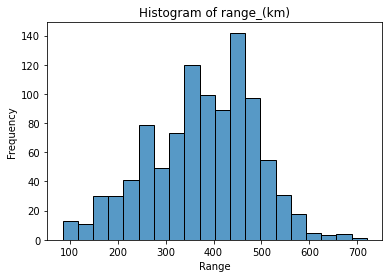

In [15]:
sns.histplot(df["range_(km)"], bins=20, kde=False)
plt.title("Histogram of range_(km)")
plt.xlabel("Range")
plt.ylabel("Frequency")
plt.show()

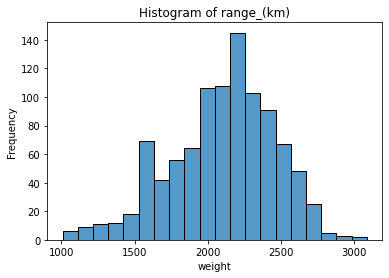

In [16]:
sns.histplot(df["weight_(kg)"], bins=20, kde=False)
plt.title("Histogram of weight")
plt.xlabel("weight")
plt.ylabel("Frequency")
plt.show()

### KDE

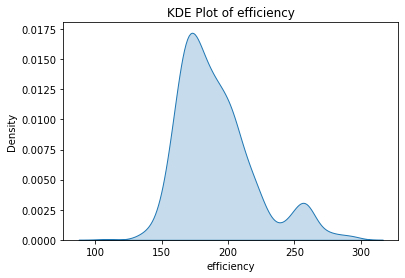

In [17]:
sns.kdeplot(df["efficiency_(wh/km)"], fill=True)
plt.title("KDE Plot of efficiency")
plt.xlabel("efficiency")
plt.show()

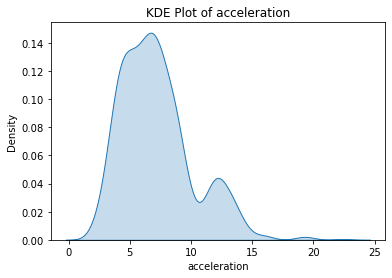

In [20]:
sns.kdeplot(df["acceleration_(0_100s)"], fill=True)
plt.title("KDE Plot of acceleration")
plt.xlabel("acceleration")
plt.show()

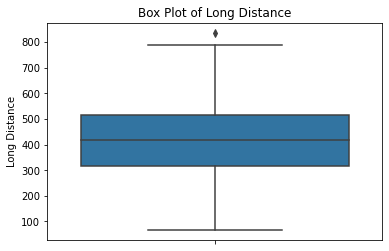

In [21]:
sns.boxplot(y=df["long_distance_(km)"])
plt.title("Box Plot of Long Distance")
plt.ylabel("Long Distance")
plt.show()

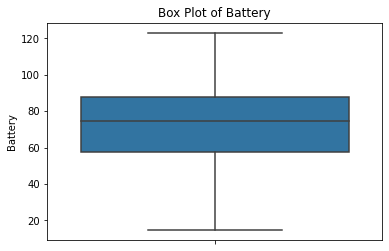

In [22]:
sns.boxplot(y=df["battery_(kwh)"])
plt.title("Box Plot of Battery")
plt.ylabel("Battery")
plt.show()

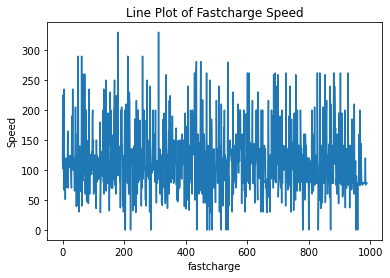

In [24]:
plt.plot(df["fastcharge_speed_(kw)"])
plt.title("Line Plot of Fastcharge Speed")
plt.xlabel("fastcharge")
plt.ylabel("Speed")
plt.show()

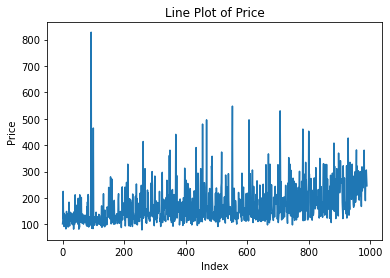

In [23]:
plt.plot(df["price/range_(€_per_km)"])
plt.title("Line Plot of Price")
plt.xlabel("Price")
plt.ylabel("Range")
plt.show()

### Categorical

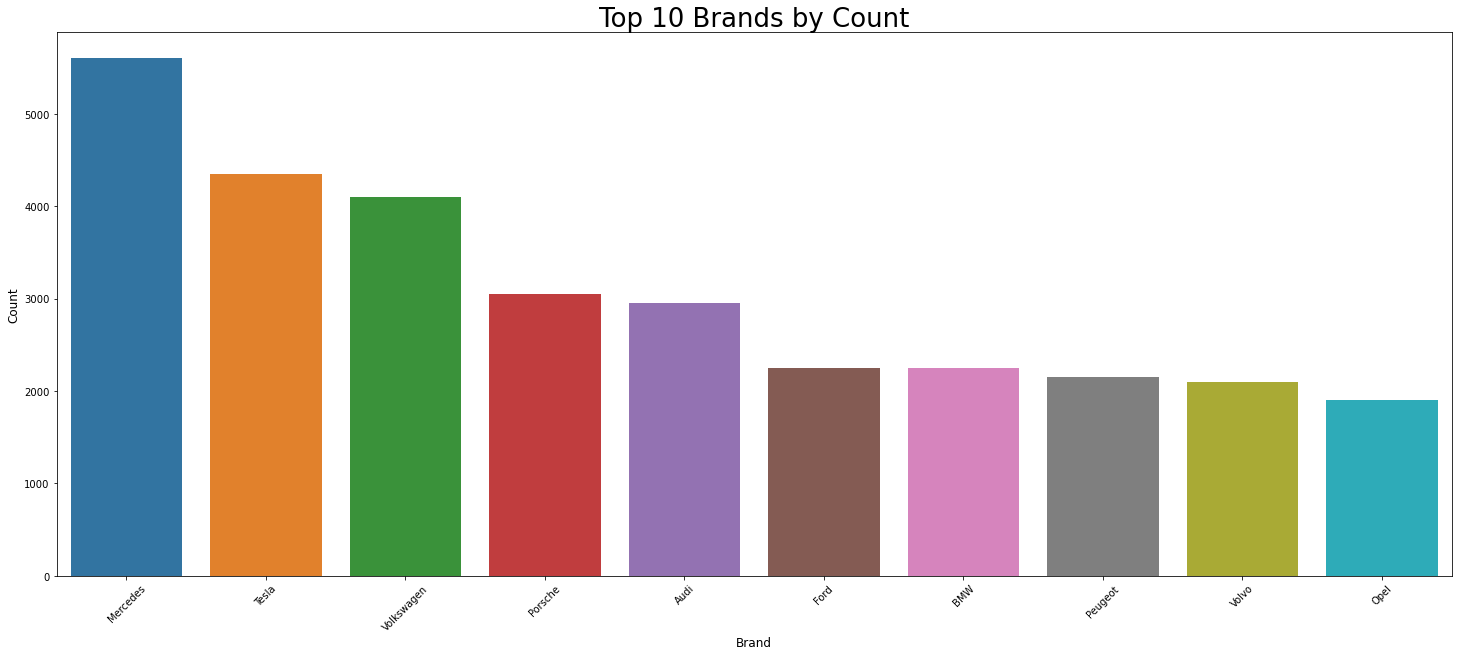

In [5]:
plt.figure(figsize=(25, 10))

brands = df["brand"].value_counts().head(10).index

sns.countplot(
    x="brand",
    data=df,
    order=brands
)

plt.title("Top 10 Brands by Count", fontsize=26)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

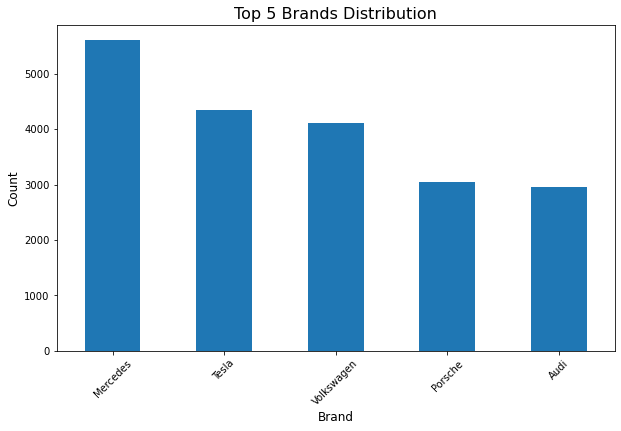

In [6]:
plt.figure(figsize=(10, 6))

df["brand"].value_counts().head(5).plot(kind="bar")

plt.title("Top 5 Brands Distribution", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=45)
plt.show()



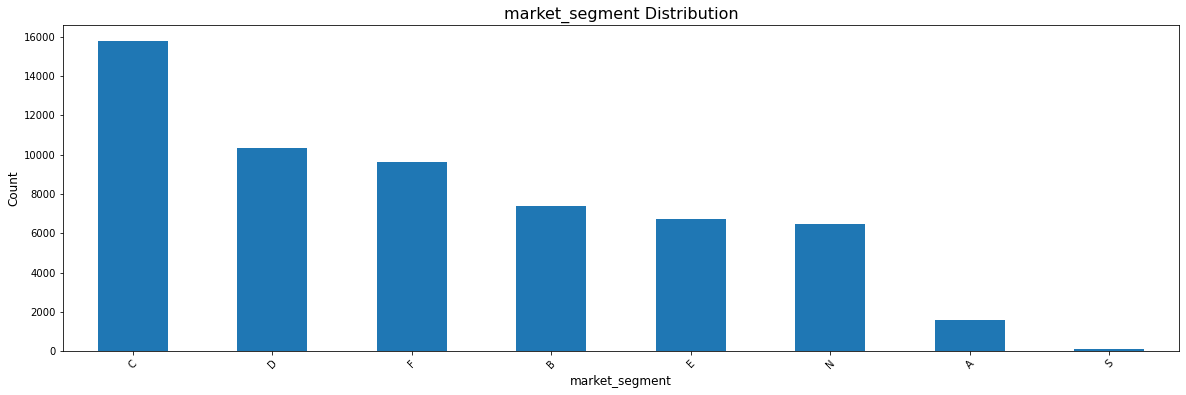

In [7]:

plt.figure(figsize=(20, 6))   # width, height in inches

df["market_segment"].value_counts().plot(kind="bar")

plt.title("market_segment Distribution", fontsize=16)
plt.xlabel("market_segment", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=45)
plt.show()


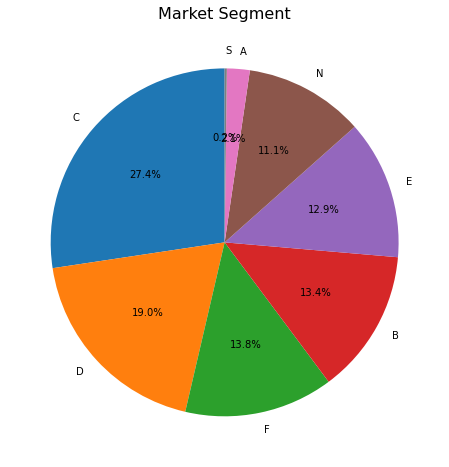

In [22]:
plt.figure(figsize=(8, 8))   

df["market_segment"].value_counts().plot.pie(autopct="%1.1f%%",startangle=90)
plt.title("Market Segment", fontsize=16)
plt.ylabel("")
plt.show()

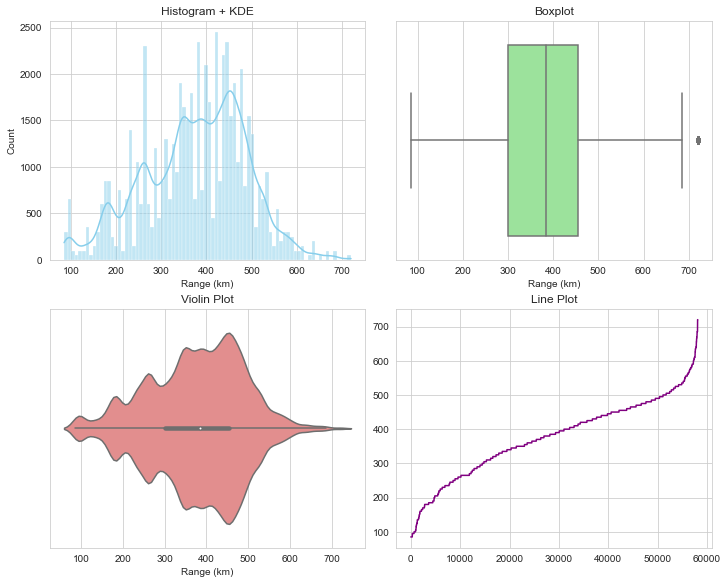

In [17]:
df = pd.read_csv("ev_database.csv")

col = "Range (km)"


sns.set_style("whitegrid") 
plt.figure(figsize=(10,8), layout='constrained')

# 1. Seaborn Histogram + KDE
plt.subplot(2,2,1)
plt.title("Histogram + KDE")
sns.histplot(df[col], kde=True, color='skyblue')

# 2. Seaborn Boxplot
plt.subplot(2,2,2)
plt.title("Boxplot")
sns.boxplot(x=df[col], color='lightgreen')

# 3. Seaborn Violin Plot
plt.subplot(2,2,3)
plt.title("Violin Plot")
sns.violinplot(x=df[col], color='lightcoral')

# 4. Seaborn Line Plot (sorted values)
plt.subplot(2,2,4)
plt.title("Line Plot")
sns.lineplot(x=range(len(df[col].dropna())), y=sorted(df[col].dropna()), color='purple')

plt.show()


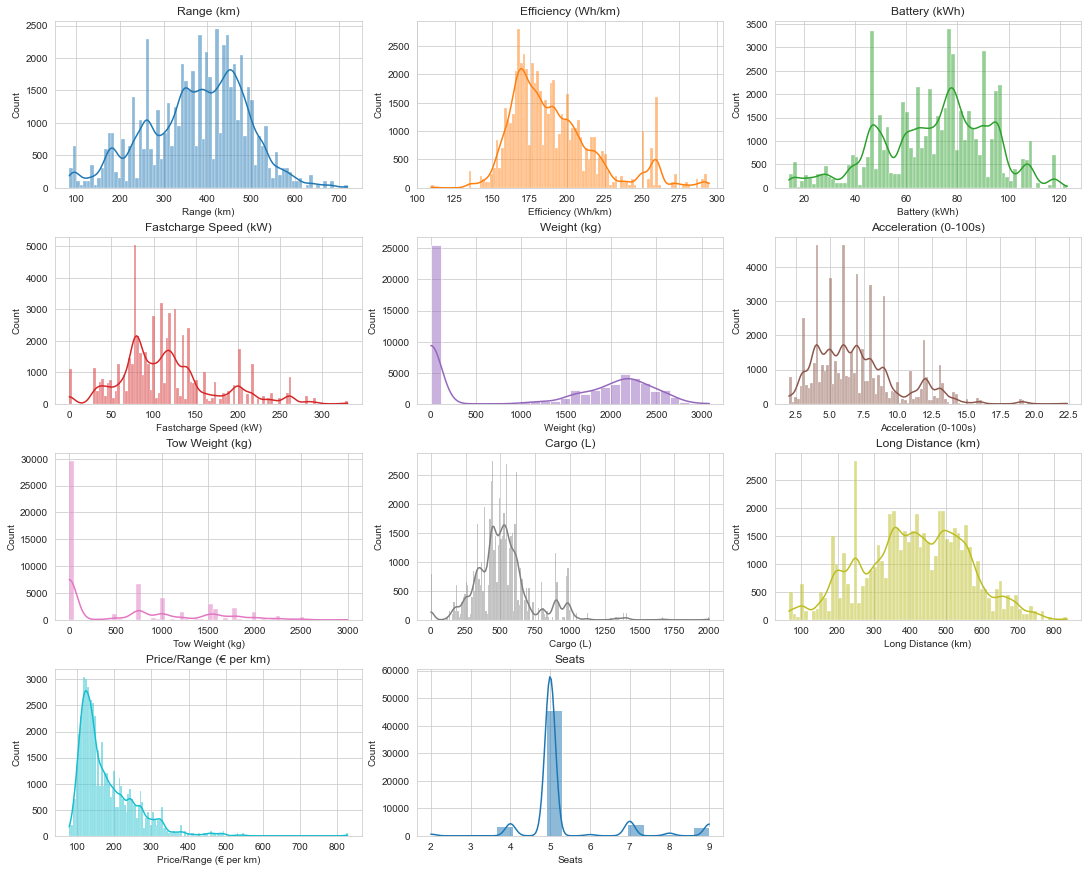

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ev_database.csv")


num_cols = df.select_dtypes(include='number').columns  # automatically detects numeric columns


sns.set_style("whitegrid")


colors = sns.color_palette("tab10", n_colors=len(num_cols)) 


fig, axes = plt.subplots(4, 3, figsize=(15, 12), layout='constrained')


axes = axes.flatten()


for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(col)


if len(num_cols) < len(axes):
    axes[-1].axis('off')

plt.show()


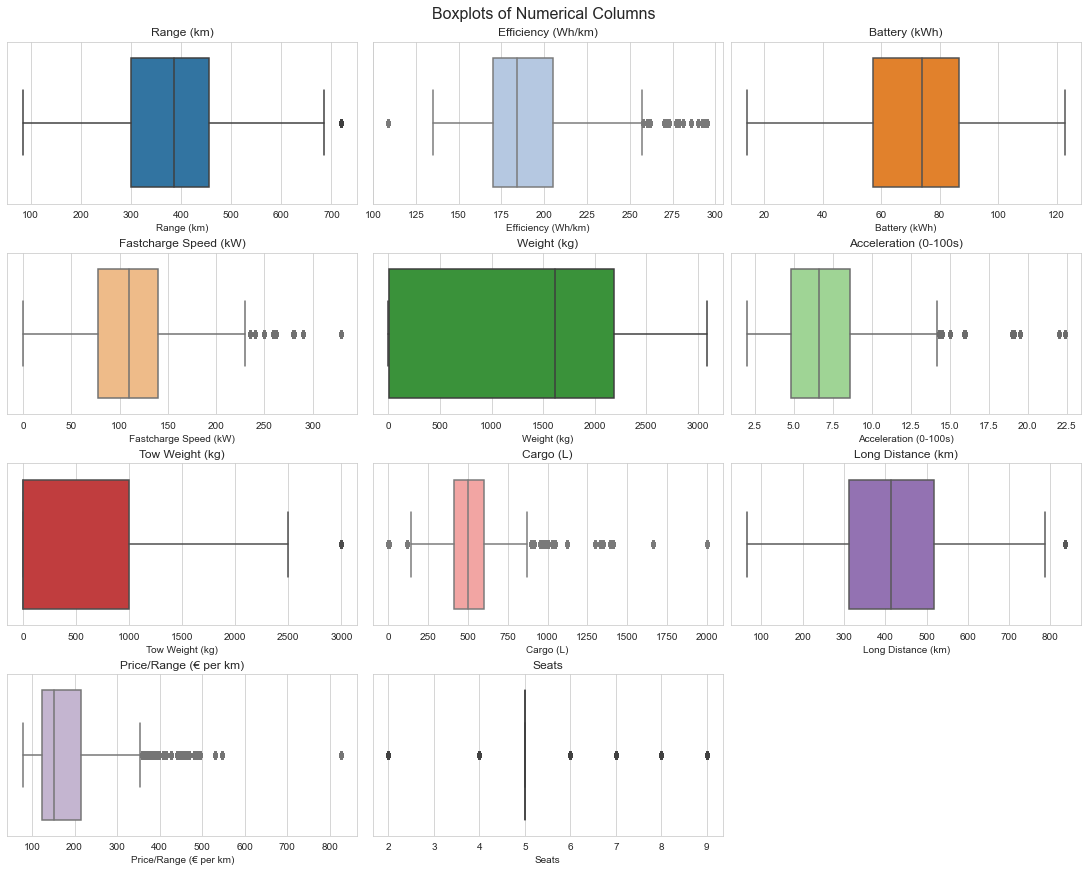

In [19]:
df = pd.read_csv("ev_database.csv")


num_cols = df.select_dtypes(include='number').columns


sns.set_style("whitegrid")

colors = sns.color_palette("tab20", n_colors=len(num_cols)) 

fig, axes = plt.subplots(4, 3, figsize=(15, 12), layout='constrained')
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col].dropna(), ax=axes[i], color=colors[i])
    axes[i].set_title(col)

if len(num_cols) < len(axes):
    axes[-1].axis('off')

plt.suptitle("Boxplots of Numerical Columns", fontsize=16)
plt.show()

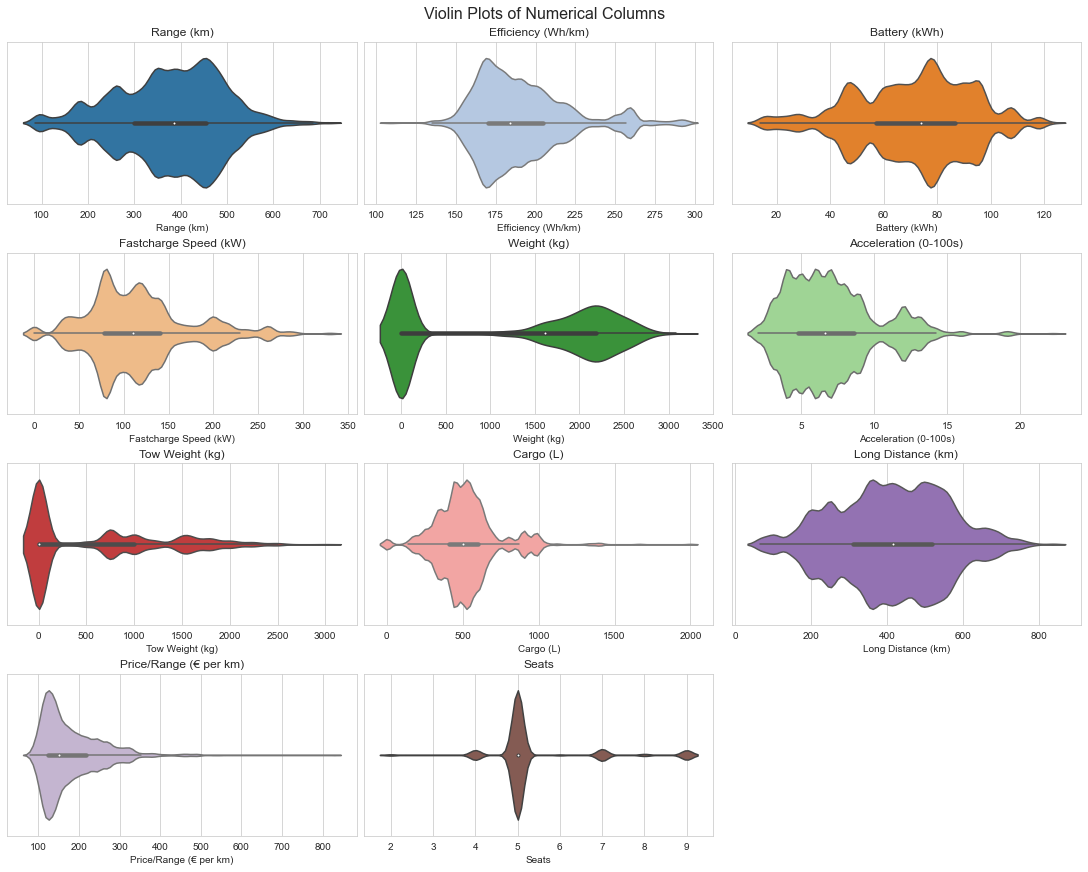

In [20]:
df = pd.read_csv("ev_database.csv")


num_cols = df.select_dtypes(include='number').columns


sns.set_style("whitegrid")


colors = sns.color_palette("tab20", n_colors=len(num_cols)) 

fig, axes = plt.subplots(4, 3, figsize=(15, 12), layout='constrained')
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.violinplot(x=df[col].dropna(), ax=axes[i], color=colors[i])
    axes[i].set_title(col)

if len(num_cols) < len(axes):
    axes[-1].axis('off')

plt.suptitle("Violin Plots of Numerical Columns", fontsize=16)
plt.show()

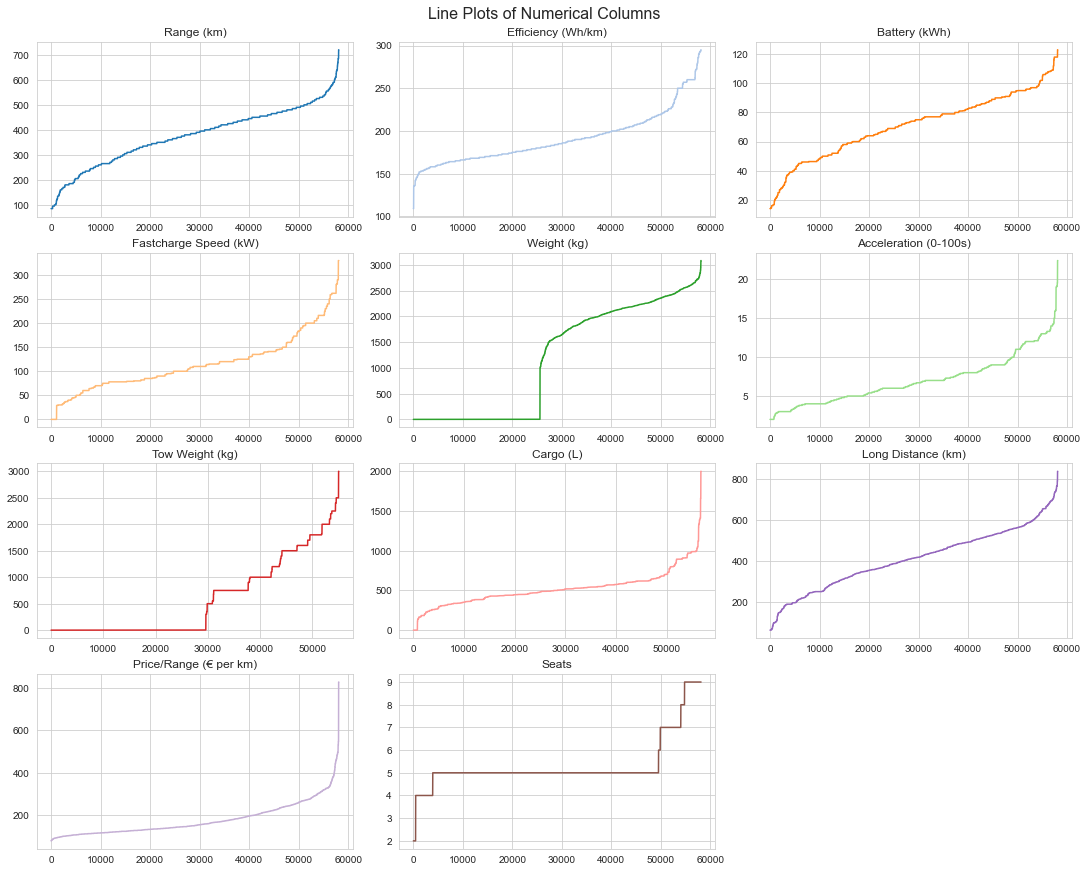

In [21]:
df = pd.read_csv("ev_database.csv")


num_cols = df.select_dtypes(include='number').columns


sns.set_style("whitegrid")


colors = sns.color_palette("tab20", n_colors=len(num_cols)) 

fig, axes = plt.subplots(4, 3, figsize=(15, 12), layout='constrained')
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.lineplot(x=range(len(df[col].dropna())), y=sorted(df[col].dropna()), ax=axes[i], color=colors[i])
    axes[i].set_title(col)

if len(num_cols) < len(axes):
    axes[-1].axis('off')

plt.suptitle("Line Plots of Numerical Columns", fontsize=16)
plt.show()

## Bivariate

### num vs num

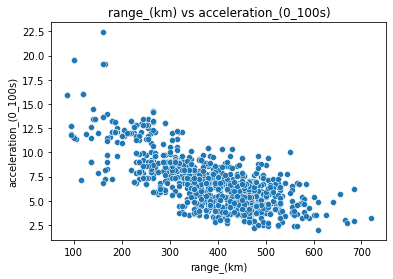

In [17]:
sns.scatterplot(x="range_(km)", y="acceleration_(0_100s)", data=df)
plt.title("range_(km) vs acceleration_(0_100s)")
plt.xlabel("range_(km)")
plt.ylabel("acceleration_(0_100s)")
plt.show()

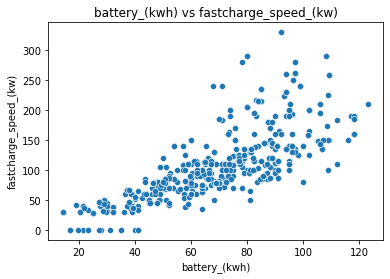

In [18]:
sns.scatterplot(x='battery_(kwh)', y='fastcharge_speed_(kw)', data=df)
plt.title("battery_(kwh) vs fastcharge_speed_(kw)")
plt.xlabel("battery_(kwh)")
plt.ylabel("fastcharge_speed_(kw)")
plt.show()

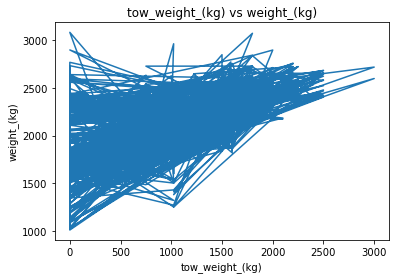

In [23]:
plt.plot(df["tow_weight_(kg)"], df["weight_(kg)"])
plt.title("tow_weight_(kg) vs weight_(kg)")
plt.xlabel("tow_weight_(kg)")
plt.ylabel("weight_(kg)")
plt.show()

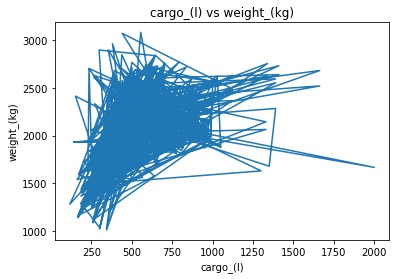

In [24]:
plt.plot(df["cargo_(l)"], df["weight_(kg)"])
plt.title("cargo_(l) vs weight_(kg)")
plt.xlabel("cargo_(l)")
plt.ylabel("weight_(kg)")
plt.show()

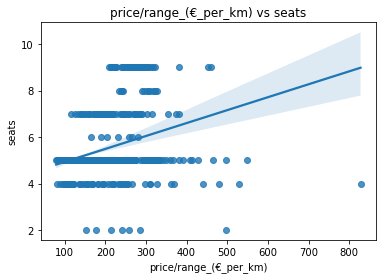

In [25]:
sns.regplot(x="price/range_(€_per_km)", y="seats", data=df)
plt.title("price/range_(€_per_km) vs seats")
plt.show()

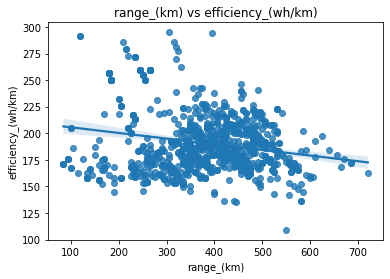

In [26]:
sns.regplot(x="range_(km)", y="efficiency_(wh/km)", data=df)
plt.title("range_(km) vs efficiency_(wh/km)")
plt.show()

### num vs cat

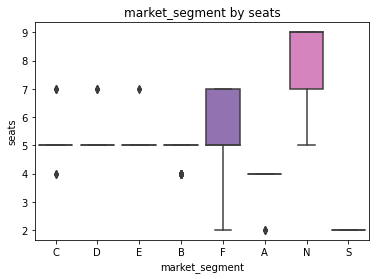

In [27]:
sns.boxplot(x="market_segment", y="seats", data=df)
plt.title("market_segment by seats")
plt.xlabel("market_segment")
plt.ylabel("seats")
plt.show()

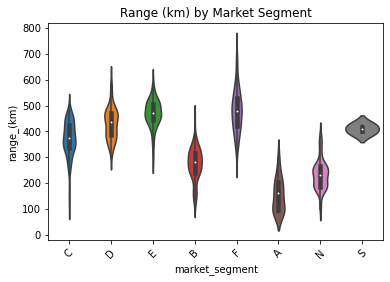

In [33]:
sns.violinplot(x="market_segment",y="range_(km)",data=df)
plt.title("Range (km) by Market Segment")
plt.xticks(rotation=45)
plt.show()


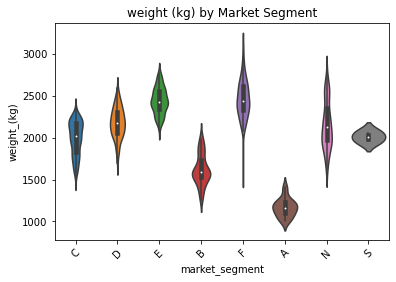

In [34]:
sns.violinplot(x="market_segment",y="weight_(kg)",data=df)
plt.title("weight (kg) by Market Segment")
plt.xticks(rotation=45)
plt.show()

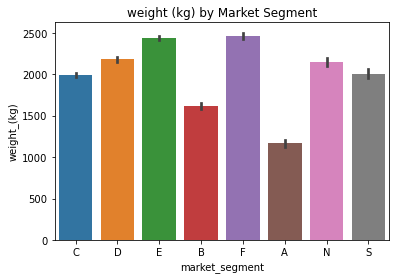

In [35]:
sns.barplot(
    x="market_segment",
    y="weight_(kg)",
    data=df
)

plt.title("weight (kg) by Market Segment")
plt.show()

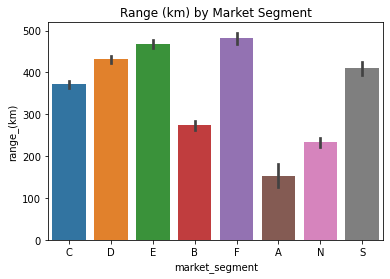

In [36]:
sns.barplot(
    x="market_segment",
    y="range_(km)",
    data=df
)

plt.title("Range (km) by Market Segment")
plt.show()

### cat vs cat

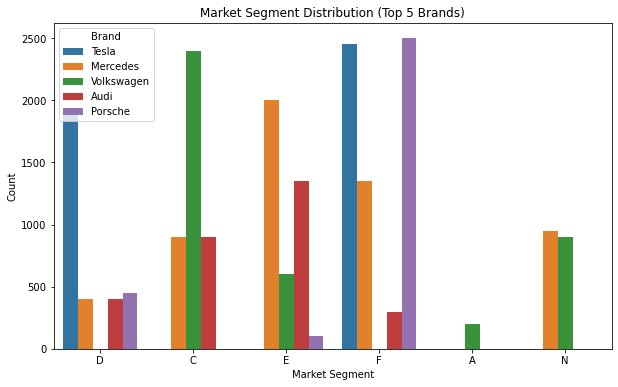

In [9]:
top_brands = df["brand"].value_counts().head(5).index
filtered_df = df[df["brand"].isin(top_brands)]
plt.figure(figsize=(10, 6))
sns.countplot(x="market_segment",hue="brand",data=filtered_df)

plt.title("Market Segment Distribution (Top 5 Brands)")
plt.xlabel("Market Segment")
plt.ylabel("Count")
plt.legend(title="Brand")
plt.show()

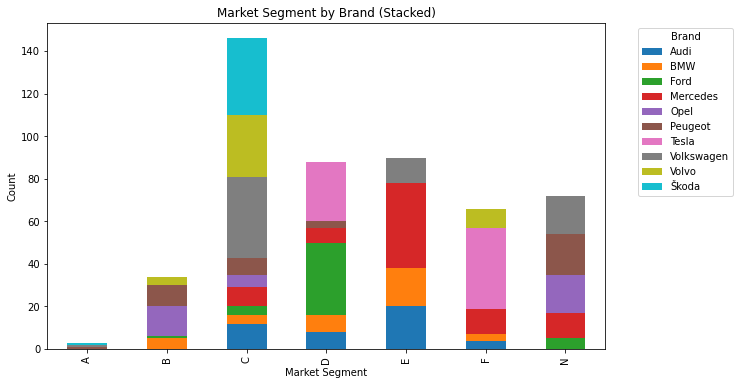

In [40]:
pd.crosstab( filtered_df["market_segment"], filtered_df["brand"]).plot(kind="bar",stacked=True,figsize=(10, 6))

plt.title("Market Segment by Brand (Stacked)")
plt.xlabel("Market Segment")
plt.ylabel("Count")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

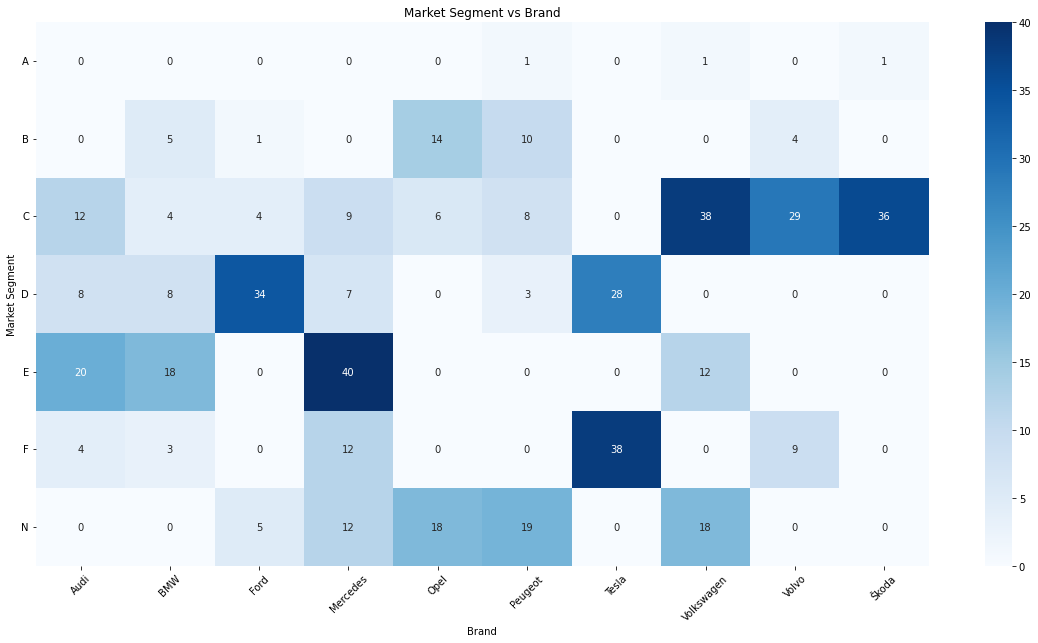

In [44]:
ct = pd.crosstab(df["market_segment"],filtered_df["brand"])

plt.figure(figsize=(20, 10))
sns.heatmap(ct,annot=True,fmt="d",cmap="Blues")
plt.title("Market Segment vs Brand")
plt.xlabel("Brand")
plt.ylabel("Market Segment")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
Multi varivate

In [ ]:
num,num,cat

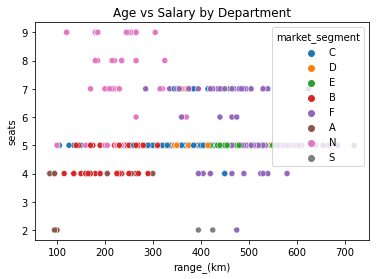

In [45]:
sns.scatterplot(
    x="range_(km)", y="seats",
    hue="market_segment",
    data=df
)
plt.title("Age vs Salary by Department")
plt.show()

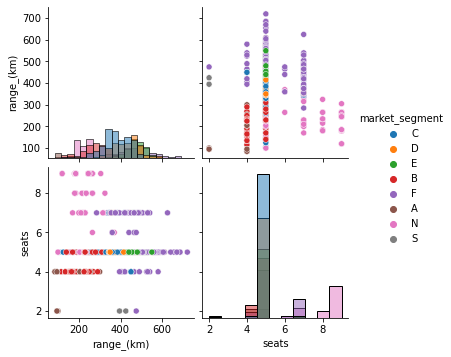

In [48]:
#plt.figure(figsize=(8, 6))
sns.pairplot(
    df,
    vars=["range_(km)", "seats"],
    hue="market_segment",
    diag_kind="hist"
)

plt.show()


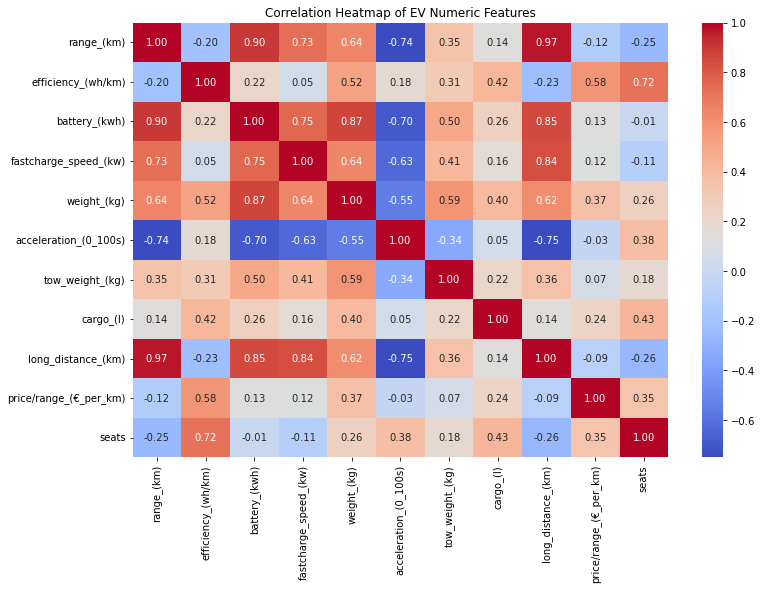

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [
    "range_(km)",
    "efficiency_(wh/km)",
    "battery_(kwh)",
    "fastcharge_speed_(kw)",
    "weight_(kg)",
    "acceleration_(0_100s)",
    "tow_weight_(kg)",
    "cargo_(l)",
    "long_distance_(km)",
    "price/range_(€_per_km)",
    "seats"
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Heatmap of EV Numeric Features")
plt.show()

